In [1]:
import imaging_behavior_functions
#import odor_behavioral_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy import optimize
import scipy.io
import os
import mat73
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from scipy.stats import iqr
from PIL import Image
import cv2
from IPython.display import display, clear_output
import time
import seaborn as sns
from scipy.stats import iqr
from scipy.ndimage import gaussian_filter1d
import glob
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import tensorflow as tf
from torchsummary import summary
from scipy.stats import circmean, circstd

### Load old

In [123]:
base_path = "//research.files.med.harvard.edu/neurobio/wilsonlab/Jingxuan/processed/MBON_FB4R_hDeltaB/old acquisition/"
folder_name = "20230805-3_MBON21hDeltaB_syntGCAMP7f_odor_apple_patchy_nobar"
example_path_data = base_path+f"{folder_name}/data/"
example_path_results = base_path+f"{folder_name}/results/"
trial_num = 1
#odor_threshold = 5
bar_jump = False

is_mat73, roi_df, dff_raw, kinematics_raw, preprocessed_vars_ds, preprocessed_vars_odor = imaging_behavior_functions.load_intermediate_mat(example_path_data,trial_num)
behav_df = imaging_behavior_functions.make_df_behavior(dff_raw, preprocessed_vars_ds, preprocessed_vars_odor,trial_num,ball_d = 9)
behav_df = imaging_behavior_functions.reconstruct_path(behav_df, ball_d = 9)
if bar_jump:
    behav_df = imaging_behavior_functions.compute_absolute_circular_diff(behav_df)
    behav_df = imaging_behavior_functions.detect_local_peaks(behav_df, init_t=10, prominence=0.1, min_time_gap=60)
roi_names, hdeltab_index, epg_index, fr1_index, hdeltab_sequence, epg_sequence, fr1_sequence = imaging_behavior_functions.get_roi_seq(roi_df)
dff_all_rois, dff_time = imaging_behavior_functions.load_dff_raw(is_mat73, dff_raw)
neural_df = imaging_behavior_functions.make_df_neural(dff_all_rois, dff_time, roi_names, hdeltab_index, epg_index, fr1_index, hdeltab_sequence, epg_sequence, fr1_sequence)
#behav_df, padded_result_df, smoothed_df = odor_behavioral_analysis.analysis_dfs(behav_df, time_interval_threshold, k, window_size)
combined_df = imaging_behavior_functions.combine_df(behav_df, neural_df)
#smoothed_df["translationalV_smoothed"] = np.sqrt(smoothed_df["fwV_smoothed"]**2+smoothed_df["sideV_smoothed"]**2)

AttributeError: module 'imaging_behavior_functions' has no attribute 'combine_df'

In [25]:
behav_df

,time,fwV,sideV,yawV,heading,abssideV,absyawV,net_motion,net_motion_state,heading_adj,odor,xPos,yPos
0,0.000000,0.000000,0.000000,0.000000,4.668550,0.000000,0.000000,0.000000,0,4.668550,0,0.000000,0.000000
1,0.240513,0.920712,-12.209755,-4.587285,4.571852,12.209755,4.587285,17.717753,1,4.571852,0,-0.167960,0.042338
2,0.481026,0.257430,-1.682556,-3.523187,4.138059,1.682556,3.523187,5.463173,1,4.138059,0,-0.207300,0.064987
3,0.721539,1.405668,-8.278464,-5.172633,4.069592,8.278464,5.172633,14.856765,1,4.069592,0,-0.426891,0.190547
4,0.962052,0.527885,-3.114793,-0.220508,3.963693,3.114793,0.220508,3.863187,1,3.963693,0,-0.513888,0.228608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,598.877285,3.003833,-0.372376,2.408172,2.095496,0.372376,2.408172,5.784381,1,-23.037246,0,-178.397982,157.320472
2491,599.117798,0.243480,-3.002783,-0.989662,2.104643,3.002783,0.989662,4.235926,1,-23.028098,0,-178.374458,157.283112
2492,599.358311,-0.334739,-0.661456,0.275579,2.128497,0.661456,0.275579,1.271774,1,-23.004244,0,-178.316613,157.351773
2493,599.598824,0.339760,2.815691,0.330911,2.146475,2.815691,0.330911,3.486362,1,-22.986266,0,-178.416519,157.276460


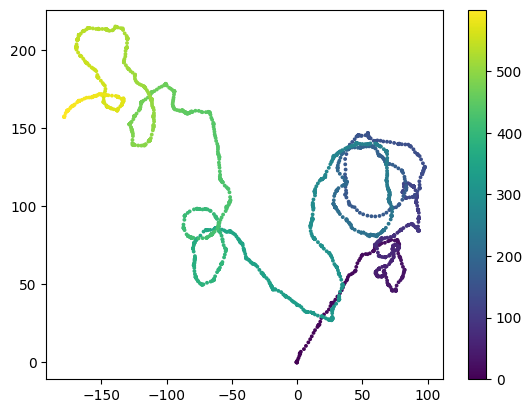

In [26]:
fig = plt.scatter(behav_df.xPos,behav_df.yPos,s=3,c = behav_df.time)
plt.colorbar(fig)

In [27]:
jumpbar_pd = pd.read_csv(example_path_data+'../panel_heading_1.txt',names = ['panel_heading','time','count'])
jumpbar_pd

,panel_heading,time,count
0,0.000000,0.020994,1
1,0.000000,0.027992,2
2,0.000080,0.032990,3
3,6.283024,0.037988,4
4,6.282815,0.043989,5
...,...,...,...
30976,4.841745,617.440808,30977
30977,4.854375,617.460801,30978
30978,4.856249,617.481795,30979
30979,4.854501,617.500788,30980


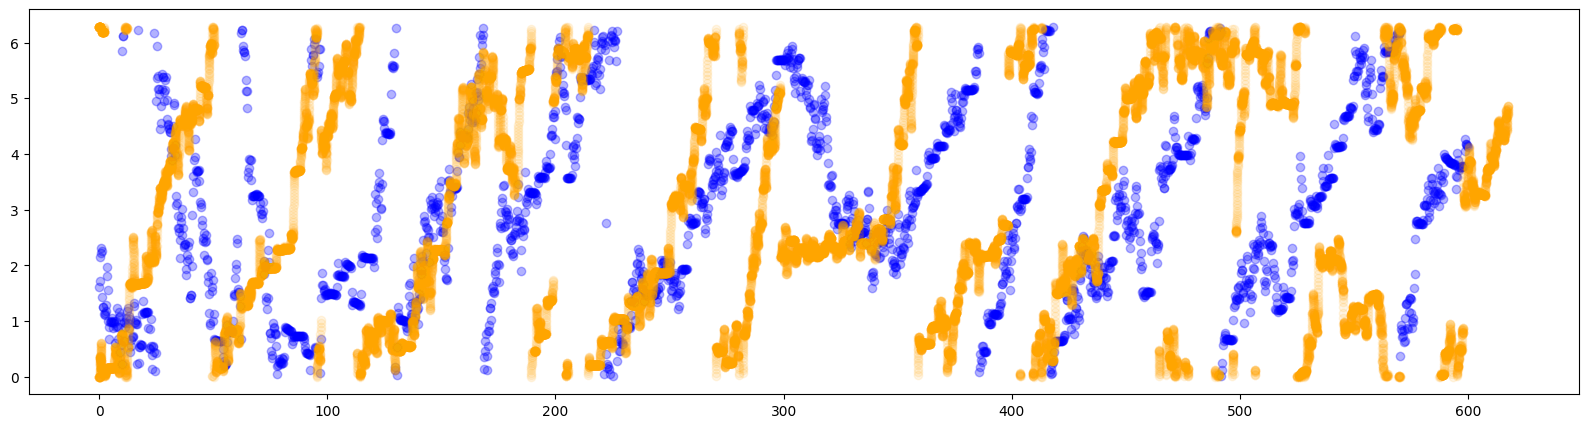

In [31]:
fig_ex, ax = plt.subplots(figsize=[20,5])
x1 = 3000
x2 = 0
ax.scatter(behav_df.time[0:len(behav_df)], 2*np.pi-behav_df.heading[0:len(behav_df)],color ='blue',alpha = 0.3)
ax.scatter(jumpbar_pd.time[:len(jumpbar_pd)-x2], jumpbar_pd.panel_heading[x2:len(jumpbar_pd)],color ='orange',alpha = 0.1)


In [17]:
heading_intp = np.interp(behav_df.time, jumpbar_pd.time[:-x2], 2*np.pi-jumpbar_pd.panel_heading[x2:])
behav_df['heading_jump'] = heading_intp

In [18]:
heading_adj = 2*np.pi-jumpbar_pd.panel_heading[x2:]
jump_label = np.abs(np.diff(np.unwrap(heading_adj)))>2 
jump_idx = np.where(jump_label)

Text(0, 0.5, 'fw velocity (mm/s)')

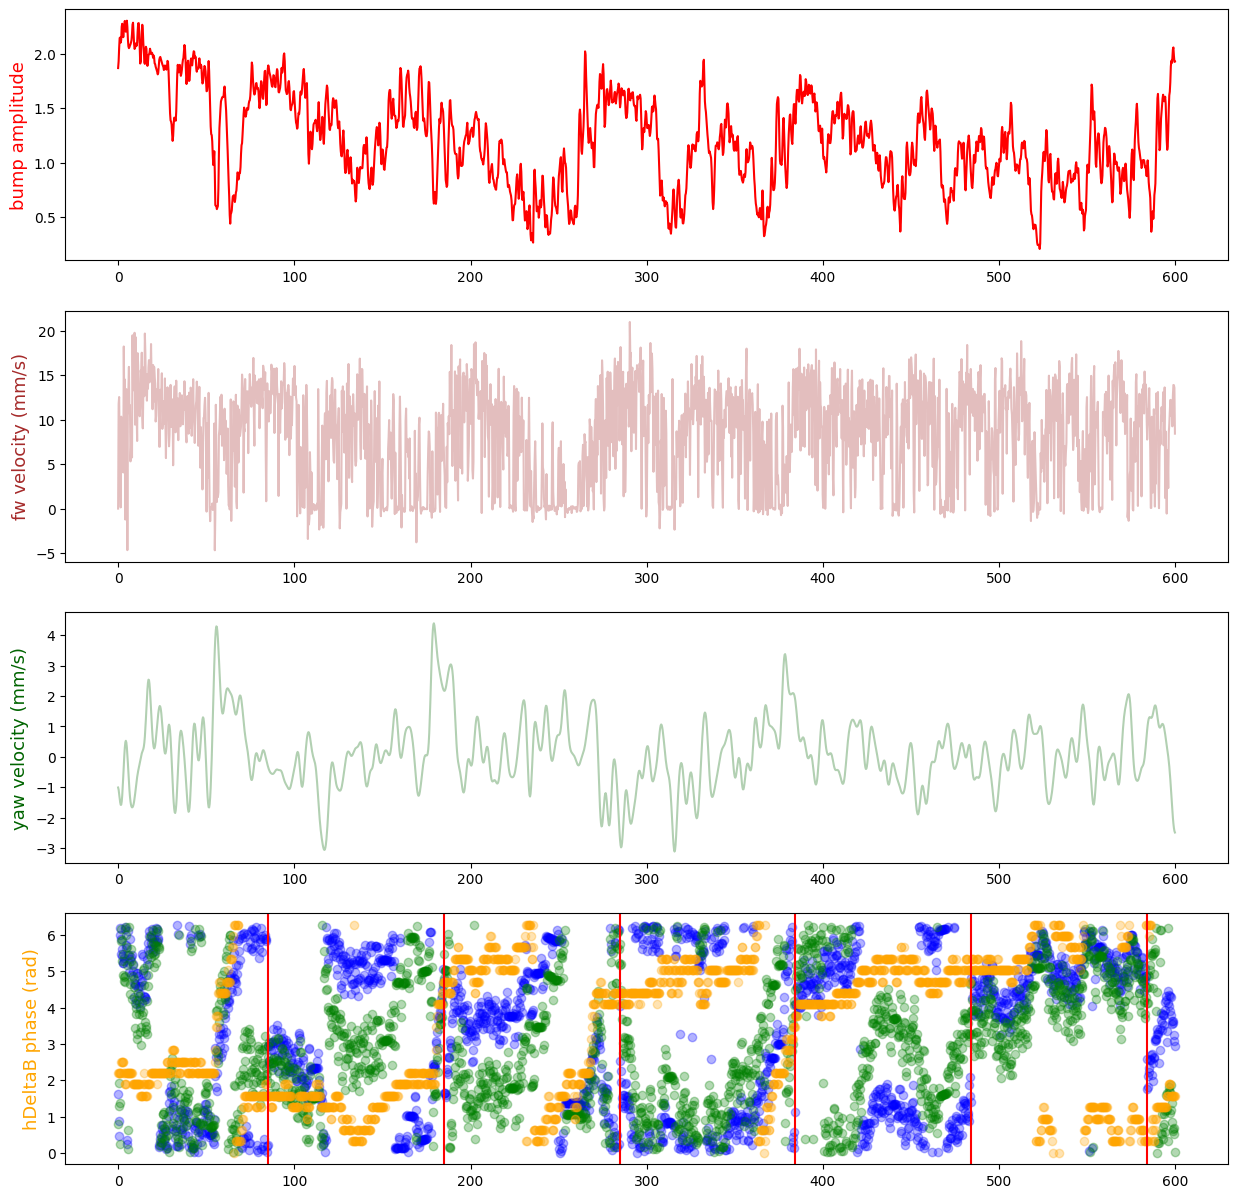

In [20]:
fig_ex, ax = plt.subplots(4,1,figsize=[15,15])
ind1 = 0
ind2 = len(behav_df) 
ax[0].plot(behav_df.time[ind1:ind2], param_df.amplitude[ind1:ind2],color = 'red')
ax[0].set_ylabel('bump amplitude', fontsize = 13, color = 'red')
ax[3].scatter(behav_df.time[ind1:ind2], heading_intp[ind1:ind2],color ='blue',alpha = 0.3)
ax[3].scatter(behav_df.time[ind1:ind2], behav_df.heading[ind1:ind2],color ='green',alpha = 0.3)
ax[3].scatter(behav_df.time[ind1:ind2], 2*np.pi-param_df.phase[ind1:ind2],color ='orange',alpha = 0.3)
#ax[3].scatter(jumpbar_pd.time[:-600], 2*np.pi-jumpbar_pd.panel_heading[600:],color ='orange',alpha = 0.1)
for i in range(len(jump_idx[0])):
    ax[3].axvline(jumpbar_pd.time[jump_idx[0][i]],color ='red')
ax[3].set_ylabel('hDeltaB phase (rad)', fontsize = 13, color = 'orange')
#ax2 = ax[3].twinx()
ax[2].plot(behav_df.time[ind1:ind2], imaging_behavior_functions.apply_gaussian_smoothing(behav_df.yawV[ind1:ind2],5),color='darkgreen',alpha = 0.3)
ax[2].set_ylabel('yaw velocity (mm/s)', fontsize = 13, color = 'darkgreen')
ax[1].plot(behav_df.time[ind1:ind2],behav_df.fwV[ind1:ind2], color = 'brown',alpha = 0.3)
ax[1].set_ylabel('fw velocity (mm/s)', fontsize = 13, color = 'brown')

In [13]:
# Function to find the index of the closest value
def find_closest_indices(values, highlight_values):
    indices = []
    for value in highlight_values:
        # Compute absolute difference and find the index of the minimum
        index = np.abs(values - value).argmin()
        indices.append(index)
    return indices

In [14]:
highlight_times = np.array(jumpbar_pd.time[jump_idx[0]])
# Find the index of the closest value for each highlight value
highlight_indices = find_closest_indices(behav_df.time, highlight_times)

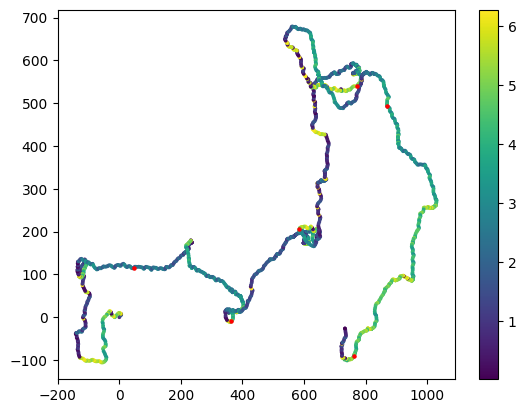

In [15]:
fig = plt.scatter(xPos,yPos,s=3,c = behav_df.heading)
# Highlight specific time points in red
for idx in highlight_indices:
    plt.scatter(xPos[idx], yPos[idx], s=5,color='red')
plt.colorbar(fig)

### Load new

In [25]:
def get_roi_seq_2(roi_df, trial_number):
    roi_df['trialNum'] = roi_df['trialNum'].apply(lambda x: x[0][0])
    
    # Filter the DataFrame to only include rows with the specified trial number
    roi_df = roi_df[roi_df['trialNum'] == trial_number].reset_index(drop=True)
    
    roi_names = roi_df['roiName'].apply(lambda x: x[0])
    roi_hdeltab = roi_names[roi_names.str.contains('hDeltaB', case=False)]
    hdeltab_index = roi_hdeltab.index
    roi_epg = roi_names[roi_names.str.contains('EPG')]
    epg_index = roi_epg.index
    roi_fr1 = roi_names[roi_names.str.contains('FR1') & ~roi_names.str.contains('CRE')]
    fr1_index = roi_fr1.index
    
    hdeltab_seq = roi_hdeltab.str.extract(r'_(\d+)')[0].astype(int).to_numpy()
    
    if epg_index.size > 0:
        epg_seq = roi_epg.str.extract(r'_(\d+)')[0].astype(int).to_numpy()
    else:
        epg_seq = None 
    
    if fr1_index.size > 0:
        fr1_seq = roi_fr1.str.extract(r'_(\d+)')[0].astype(int).to_numpy()
    else:
        fr1_seq = None 
    
    return np.array(roi_names), hdeltab_index, epg_index, fr1_index, hdeltab_seq, epg_seq, fr1_seq

In [111]:
base_path = "//research.files.med.harvard.edu/neurobio/wilsonlab/Jingxuan/standby/"
folder_name = "20250219-2_MBON21hDeltaB_noodor"
example_path_data = base_path+f"{folder_name}/data/"
example_path_results = base_path+f"{folder_name}/results/"
trial_num = 5
bar_jump = True
is_mat73, roi_df, dff_raw = imaging_behavior_functions.load_intermediate_mat_new(example_path_data,trial_num)
roi_names, hdeltab_index, epg_index, fr1_index, hdeltab_sequence, epg_sequence, fr1_sequence = get_roi_seq_2(roi_df, trial_num)
dff_all_rois, dff_time = imaging_behavior_functions.load_dff_raw(is_mat73, dff_raw)
neural_df = imaging_behavior_functions.make_df_neural(dff_all_rois, dff_time, roi_names, hdeltab_index, epg_index, fr1_index, hdeltab_sequence, epg_sequence, fr1_sequence)
roi_kw = 'hDeltaB'
roi_kw2 = 'CRE'
if len([col for col in neural_df.columns if roi_kw.lower() in col.lower()])>0:
    roi_mtx = imaging_behavior_functions.extract_heatmap_2(neural_df, roi_kw, roi_kw2)
    neural_df,paramfit_df = imaging_behavior_functions.fit_sinusoid(neural_df,roi_mtx)
behav_df, neural_df_new = imaging_behavior_functions.load_matfile_to_df(example_path_data, folder_name, trial_num,is_odor_trial=True)
behav_df = imaging_behavior_functions.rename_dataframe(behav_df)
if bar_jump:
    behav_df = imaging_behavior_functions.compute_absolute_circular_diff(behav_df)
    behav_df = imaging_behavior_functions.detect_local_peaks(behav_df, init_t=0, prominence=0.1, min_time_gap=60)
#behav_df = imaging_behavior_functions.detect_jumps_unwrapped(behav_df, 'heading', 'time', jump_threshold=np.pi/4, min_time_between_jumps=60)
behav_df = imaging_behavior_functions.make_df_behavior_new(behav_df)
#behav_df, block_boundaries = imaging_behavior_functions.label_blocks_5_v2(behav_df,50,time_lengths=[300,120,300],detection_threshold=0.05,required_consecutive=5)
#behav_df, block_boundaries = imaging_behavior_functions.label_blocks_3(behav_df,50)

#behav_df = imaging_behavior_functions.calc_segment_modes_filtered_v2(behav_df)
behav_df = imaging_behavior_functions.calculate_theta_g_rho(behav_df)

#behav_df, block_boundaries = imaging_behavior_functions.label_blocks_3(behav_df,50)
# Get both filtered data and mask
'''motion_threshold=1
behav_df, motion_mask = filter_by_motion(behav_df, 
                                                motion_threshold, 
                                                return_mask=True)'''
# Apply same mask to neural_df if needed
#neural_df = neural_df[motion_mask]
merged_df = imaging_behavior_functions.merge_dataframes(neural_df, behav_df,method = 'nearest')


Loaded using mat73.


In [112]:
merged_df.columns

Index(['time', 'MBON21L', 'MBON21R', 'hDeltaB_0', 'hDeltaB_1', 'hDeltaB_2',
       'hDeltaB_3', 'hDeltaB_4', 'hDeltaB_5', 'hDeltaB_6', 'hDeltaB_7',
       'hDeltaB_8', 'hDeltaB_9', 'hDeltaB_10', 'hDeltaB_11', 'hDeltaB_12',
       'hDeltaB_13', 'hDeltaB_14', 'hDeltaB_15', 'hDeltaB_16', 'phase',
       'baseline', 'amplitude', 'phase_error', 'baseline_error',
       'amplitude_error', 'xPos', 'yPos', 'fwV', 'sideV', 'odor', 'yawV',
       'heading', 'heading_diff', 'odor_state', 'absolute_circular_diff',
       'jump_detected', 'abssideV', 'absyawV', 'net_motion',
       'net_motion_state', 'speed', 'theta_g', 'rho_t'],
      dtype='object')

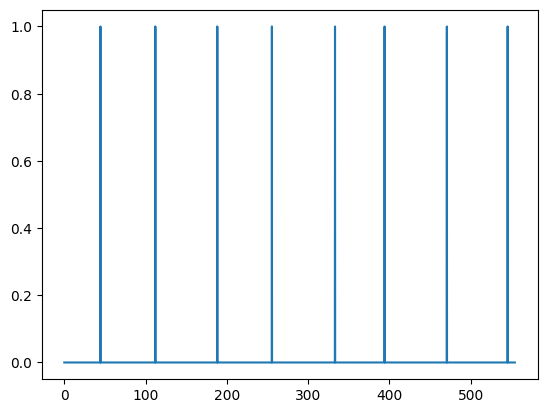

In [113]:
plt.plot(merged_df.time,merged_df.jump_detected)

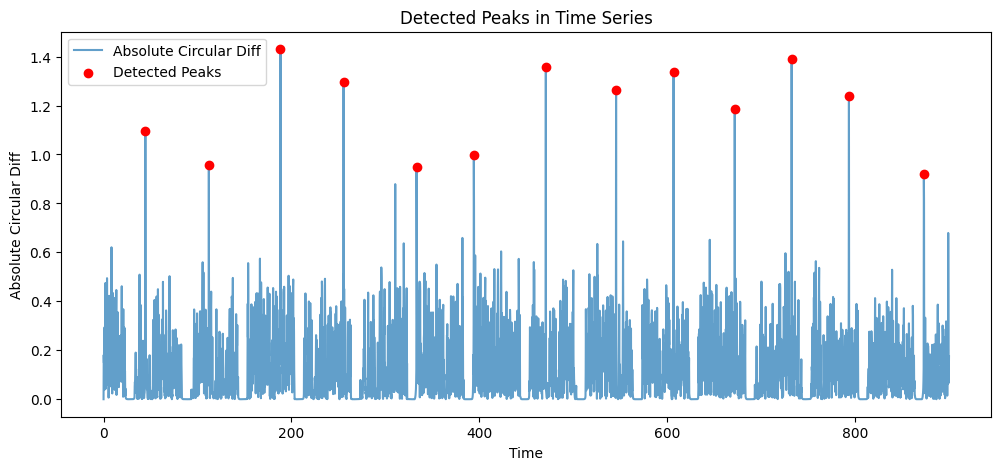

In [114]:
# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(behav_df["time"], behav_df["absolute_circular_diff"], label="Absolute Circular Diff", alpha=0.7)
plt.scatter(behav_df[behav_df["jump_detected"] == 1]["time"], 
            behav_df[behav_df["jump_detected"] == 1]["absolute_circular_diff"], 
            color='red', label="Detected Peaks", zorder=3)
plt.xlabel("Time")
plt.ylabel("Absolute Circular Diff")
plt.legend()
plt.title("Detected Peaks in Time Series")
plt.show()




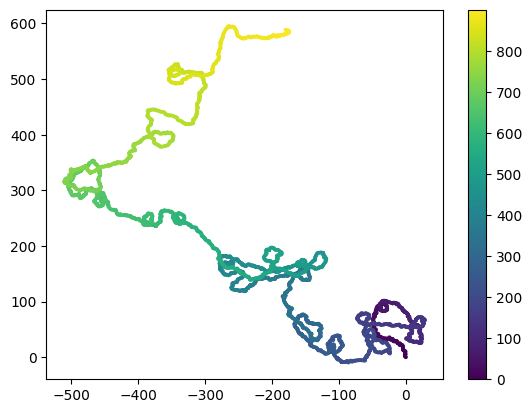

In [115]:
fig = plt.scatter(behav_df.xPos,behav_df.yPos,s=3,c = behav_df.time)
plt.colorbar(fig)

In [116]:
def plot_aligned_traces(
    df, binary_col, query_col, time_col, color_col=None, align_to="on", window=(-1, 1), bins=None, is_circular=False
):
    """
    Plots query variable traces aligned to binary state ON or OFF transitions.
    If `is_circular` is True, uses a scatter plot.
    """
    # Detect transitions (state changes)
    if align_to == "on":
        transition_idxs = df.index[(df[binary_col] == 1) & (df[binary_col].shift(1) == 0)]
    elif align_to == "off":
        transition_idxs = df.index[(df[binary_col] == 0) & (df[binary_col].shift(1) == 1)]
    else:
        raise ValueError("align_to must be 'on' or 'off'.")

    # Store all extracted traces
    all_traces = []
    time_shifts = []
    colors = []

    # Iterate over transitions
    for idx in transition_idxs:
        t0 = df.loc[idx, time_col]  # Get transition time
        start_time, end_time = t0 + window[0], t0 + window[1]  # Define window range
        subset = df[(df[time_col] >= start_time) & (df[time_col] <= end_time)]  # Extract data

        if not subset.empty:
            aligned_time = subset[time_col] - t0  # Align time to transition (t=0)
            all_traces.append(subset[query_col].values)  # Store query variable values
            time_shifts.append(aligned_time.values)  # Store aligned time values
            colors.append(df.loc[idx, color_col] if color_col else None)  # Store color variable

    # Convert to arrays
    all_traces = np.array(all_traces, dtype=object)
    time_shifts = np.array(time_shifts, dtype=object)

    # Default to blue if no color column is provided
    if color_col is None:
        colors = None
    else:
        colors = np.array(colors)

    # Handle binning of the color variable
    if color_col and bins is not None:
        bin_edges = np.linspace(colors.min(), colors.max(), bins + 1)
        color_bins = np.digitize(colors, bin_edges) - 1  # Bin indices
        unique_bins = np.unique(color_bins)
    else:
        color_bins = colors if colors is not None else None
        unique_bins = np.unique(colors) if colors is not None else None

    # Define colormap
    cmap = cm.get_cmap("viridis", len(unique_bins)) if color_col else cm.get_cmap("viridis")
    norm = mcolors.Normalize(vmin=colors.min(), vmax=colors.max()) if color_col else None

    plt.figure(figsize=(8, 5))

    # Choose plot type based on is_circular
    for i, (time_trace, query_trace) in enumerate(zip(time_shifts, all_traces)):
        if color_col:
            bin_idx = color_bins[i] if bins is not None else colors[i]
            color = cmap(norm(bin_idx))
        else:
            color = cmap(i / len(all_traces))

        if is_circular:
            plt.scatter(time_trace, query_trace, s=10, color=color, alpha=0.5)
        else:
            plt.plot(time_trace, query_trace, alpha=0.3, color=color)

    # Labels and legend
    plt.xlabel("Time (s, aligned to transition)")
    plt.ylabel(query_col)
    plt.axvline(0, color="k", linestyle="--", linewidth=1)  # Mark transition point
    plt.title(f"{query_col} aligned to {binary_col} {align_to.upper()} transitions")
    
    if color_col:
        plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label=color_col)
    
    plt.grid(True)
    plt.show()


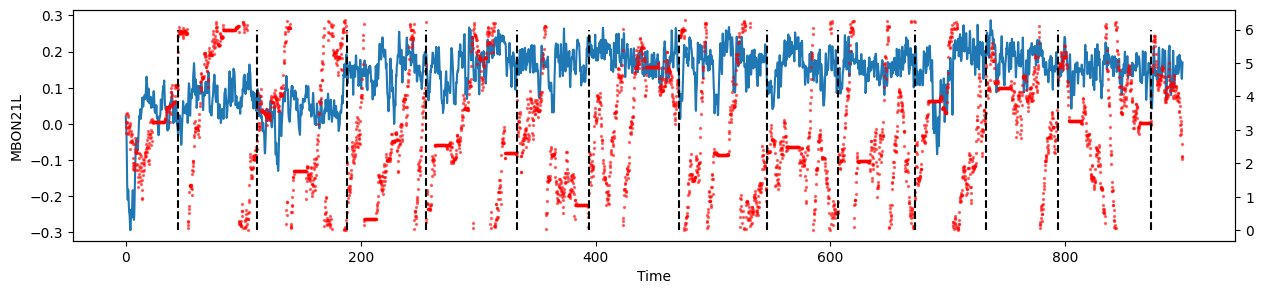

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
idx1 = 0
idx2 = -1
ax.plot(neural_df.time[idx1:idx2], neural_df['MBON21R'][idx1:idx2])
ax2 = ax.twinx()
ax2.scatter(behav_df.time[idx1:idx2], behav_df.heading[idx1:idx2], color='red',s = 2, alpha=0.5)
# Extracting indices where jump_detected is 1
jump_indices = behav_df[behav_df['jump_detected'] == 1].index

# Plotting all vertical lines in a single call
ax2.vlines(behav_df.time[jump_indices], ymin=0, ymax=6, colors='black', linestyles='--', label='Jump Detected')

# Add labels and legends
ax.set_xlabel('Time')
ax.set_ylabel('MBON21L')
#ax.set_xlim(behav_df.time[idx1], behav_df.time[idx2])
#ax.legend()

plt.show()

C:\Users\wilson\AppData\Local\Temp\ipykernel_4352\1051452498.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis", len(unique_bins)) if color_col else cm.get_cmap("viridis")


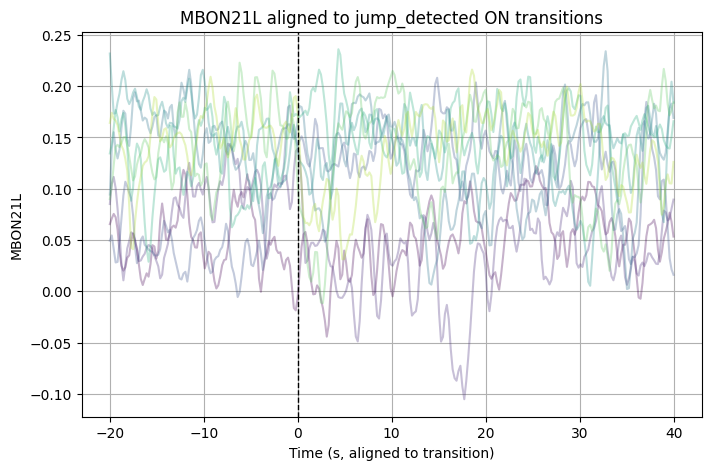

In [118]:
plot_aligned_traces(
    merged_df, 'jump_detected', 'MBON21L', 'time', color_col=None, align_to="on", window=(-20, 40), bins=None
)

C:\Users\wilson\AppData\Local\Temp\ipykernel_4352\1051452498.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis", len(unique_bins)) if color_col else cm.get_cmap("viridis")


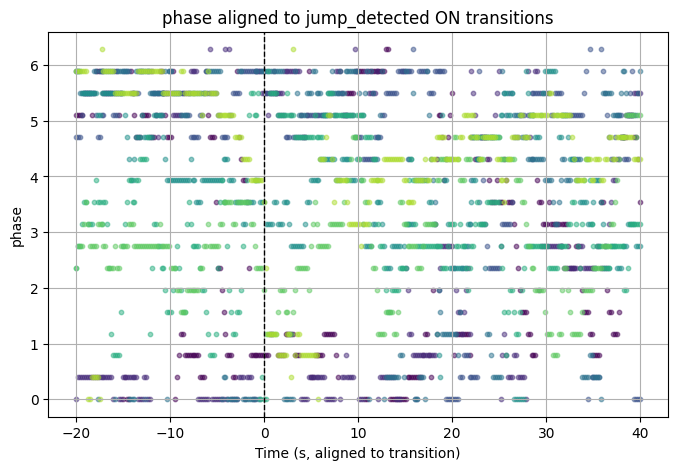

In [119]:
plot_aligned_traces(
    merged_df, 'jump_detected', 'phase', 'time', color_col=None, align_to="on", window=(-20, 40), bins=None,is_circular=True
)

#### Examine no bar

In [1]:
import imaging_behavior_functions
#import odor_behavioral_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io
import os
import mat73
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from scipy.stats import iqr
from PIL import Image
import cv2
from IPython.display import display, clear_output
import time
import seaborn as sns
from scipy.stats import iqr
from scipy.ndimage import gaussian_filter1d
import glob
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import tensorflow as tf
from torchsummary import summary
from scipy.stats import sem
import random
import json
from scipy.integrate import quad
from scipy.stats import circmean, circstd
from scipy.stats import gaussian_kde
from sklearn.cluster import DBSCAN
from typing import List
#import h5py
from imaging_behavior_functions import (
    load_intermediate_mat,
    make_df_behavior,
    reconstruct_path,
    get_roi_seq,
    get_roi_seq_2,
    load_dff_raw,
    make_df_neural,
    merge_dataframes,
    fit_sinusoid,
    calculate_theta_g_rho
)
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.stats import entropy
from scipy.signal import welch
from scipy.spatial.distance import pdist, squareform
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

In [2]:
def compute_odor_metrics_2(df, heading_window_size=5, burstiness_window=5, novelty_weight=0.5):
    """
    Computes odor-related event metrics, including onset/offset-based calculations and 
    event-specific sensory information.

    Parameters:
    - df (pd.DataFrame): Must contain 'odor_state', 'time', and 'heading' columns.
    - heading_window_size (float): Time window before onset to average heading.
    - burstiness_window (int): Number of prior intervals to use for burstiness score.
    - novelty_weight (float): Weight factor for novelty score calculation.

    Returns:
    - pd.DataFrame with additional computed columns.
    """
    onset_indices = df.index[(df["odor_state"].shift(1, fill_value=0) == 0) & (df["odor_state"] == 1)]
    offset_indices = df.index[(df["odor_state"].shift(1, fill_value=0) == 1) & (df["odor_state"] == 0)]

    # Initialize new columns
    df["odor_duration"] = np.nan
    df["past_interval"] = np.nan
    df["odor_heading_avg"] = np.nan
    df["prior_odor_duration"] = np.nan

    # New metrics
    df["surprise_index"] = np.nan
    df["adaptation_index"] = np.nan
    df["novelty_score"] = np.nan
    df["burstiness_score"] = np.nan

    last_odor_duration = 0  # Default for the first odor encounter
    prior_intervals = []  # Store prior intervals for burstiness calculation

    for i, onset_idx in enumerate(onset_indices):
        # Find the first offset after the onset
        offset_idx = offset_indices[offset_indices > onset_idx].min()

        if pd.notna(offset_idx):
            # Compute odor duration
            odor_duration = df.loc[offset_idx, "time"] - df.loc[onset_idx, "time"]
            df.loc[onset_idx, "odor_duration"] = odor_duration
            df.loc[onset_idx, "prior_odor_duration"] = last_odor_duration
            last_odor_duration = odor_duration  # Update for next iteration
        else:
            df.loc[onset_idx, "prior_odor_duration"] = last_odor_duration

        # Compute past interval (ISI)
        last_offset_idx = offset_indices[offset_indices < onset_idx].max()
        if pd.notna(last_offset_idx):
            past_interval = df.loc[onset_idx, "time"] - df.loc[last_offset_idx, "time"]
        else:
            past_interval = df.loc[onset_idx, "time"] - df["time"].iloc[0]

        df.loc[onset_idx, "past_interval"] = past_interval
        prior_intervals.append(past_interval)

        # Compute Surprise Index (Higher for longer past intervals)
        df.loc[onset_idx, "surprise_index"] = past_interval

        # Compute Adaptation Index (Ratio of prior duration to prior interval, avoid division by zero)
        df.loc[onset_idx, "adaptation_index"] = np.nan if past_interval == 0 else last_odor_duration / past_interval

        # Compute Novelty Score (penalizes long prior odor durations)
        df.loc[onset_idx, "novelty_score"] = past_interval - (novelty_weight * last_odor_duration)

        # Compute Burstiness Score (variability of past K intervals)
        if len(prior_intervals) > 1:
            windowed_intervals = prior_intervals[max(0, i - burstiness_window):i]
            if len(windowed_intervals) > 1:
                burstiness = np.std(windowed_intervals) / np.mean(windowed_intervals) if np.mean(windowed_intervals) > 0 else np.nan
            else:
                burstiness = np.nan
        else:
            burstiness = np.nan

        df.loc[onset_idx, "burstiness_score"] = burstiness

        # Compute average heading before onset
        onset_time = df.loc[onset_idx, "time"]
        window_start_time = onset_time - heading_window_size
        heading_window = df[(df["time"] >= window_start_time) & (df["time"] < onset_time)]["heading"]

        if not heading_window.empty:
            df.loc[onset_idx, "odor_heading_avg"] = circmean(heading_window)

    # Set first encounter's prior odor duration to 0
    first_onset_idx = onset_indices.min()
    if pd.notna(first_onset_idx):
        df.loc[first_onset_idx, "prior_odor_duration"] = 0

    return df

# TODO: fix offet calculation part
def compute_event_metrics_3(df, state_col="odor_state", time_col="time", heading_col="heading", 
                          heading_window_size=5, burstiness_window=5, novelty_weight=0.5):
    """
    Computes event-based metrics for both ON and OFF transitions of a binary state variable.
    
    Parameters:
    - df (pd.DataFrame): DataFrame with binary state variable (e.g., odor presence).
    - state_col (str): Name of the binary column indicating event presence (0 or 1).
    - time_col (str): Name of the time column.
    - heading_col (str): Name of the heading column.
    - heading_window_size (float): Time window before an event to average heading.
    - burstiness_window (int): Number of prior intervals to use for burstiness score.
    - novelty_weight (float): Weight factor for novelty score calculation.

    Returns:
    - pd.DataFrame with additional computed columns at both ON and OFF transitions.
    """

    onset_indices = df.index[(df[state_col].shift(1, fill_value=0) == 0) & (df[state_col] == 1)]
    offset_indices = df.index[(df[state_col].shift(1, fill_value=0) == 1) & (df[state_col] == 0)]

    # Initialize new columns
    df["event_duration"] = np.nan
    df["past_interval"] = np.nan
    df["prior_event_duration"] = np.nan
    df["heading_avg"] = np.nan

    # Additional sensory processing metrics
    df["surprise_index"] = np.nan
    df["adaptation_index"] = np.nan
    df["novelty_score"] = np.nan
    df["burstiness_score"] = np.nan

    last_event_duration = 0  # Default for the first encounter
    prior_intervals = []  # Store prior intervals for burstiness calculation

    all_indices = np.sort(np.concatenate([onset_indices, offset_indices]))  # Order all events

    for i, event_idx in enumerate(all_indices):
        is_onset = event_idx in onset_indices
        event_label = "ON" if is_onset else "OFF"

        # Find matching onset or offset for duration calculation
        if is_onset:
            matching_offset_idx = offset_indices[offset_indices > event_idx].min()
        else:
            matching_onset_idx = onset_indices[onset_indices > event_idx].min()
        
        # Compute event duration
        if is_onset and pd.notna(matching_offset_idx):
            event_duration = df.loc[matching_offset_idx, time_col] - df.loc[event_idx, time_col]
        elif not is_onset and pd.notna(matching_onset_idx):
            event_duration = df.loc[event_idx, time_col] - df.loc[matching_onset_idx, time_col]
        else:
            event_duration = np.nan

        df.loc[event_idx, "event_duration"] = event_duration
        df.loc[event_idx, "prior_event_duration"] = last_event_duration
        last_event_duration = event_duration  # Update for next iteration

        # Compute past interval (ISI)
        prev_event_idx = all_indices[all_indices < event_idx].max() if i > 0 else None
        if pd.notna(prev_event_idx):
            past_interval = df.loc[event_idx, time_col] - df.loc[prev_event_idx, time_col]
        else:
            past_interval = df.loc[event_idx, time_col] - df[time_col].iloc[0]

        df.loc[event_idx, "past_interval"] = past_interval
        prior_intervals.append(past_interval)

        # Compute Surprise Index (Higher for longer past intervals)
        df.loc[event_idx, "surprise_index"] = past_interval

        # Compute Adaptation Index (Ratio of prior duration to prior interval, avoid division by zero)
        df.loc[event_idx, "adaptation_index"] = np.nan if past_interval == 0 else last_event_duration / past_interval

        # Compute Novelty Score (penalizes long prior event durations)
        df.loc[event_idx, "novelty_score"] = past_interval - (novelty_weight * last_event_duration)

        # Compute Burstiness Score (variability of past K intervals)
        if len(prior_intervals) > 1:
            windowed_intervals = prior_intervals[max(0, i - burstiness_window):i]
            if len(windowed_intervals) > 1:
                burstiness = np.std(windowed_intervals) / np.mean(windowed_intervals) if np.mean(windowed_intervals) > 0 else np.nan
            else:
                burstiness = np.nan
        else:
            burstiness = np.nan

        df.loc[event_idx, "burstiness_score"] = burstiness

        # Compute average heading before the event (if heading data is available)
        event_time = df.loc[event_idx, time_col]
        window_start_time = event_time - heading_window_size
        heading_window = df[(df[time_col] >= window_start_time) & (df[time_col] < event_time)][heading_col]

        if not heading_window.empty:
            df.loc[event_idx, "heading_avg"] = circmean(heading_window)

    # Ensure first encounter's prior duration is set to 0
    first_event_idx = all_indices.min()
    if pd.notna(first_event_idx):
        df.loc[first_event_idx, "prior_event_duration"] = 0

    return df



def compute_event_metrics_4(df, state_col="odor_state", time_col="time", heading_col="heading", 
                            heading_window_size=5, burstiness_window=5, novelty_weight=0.5):
    """
    Computes event-based metrics for both ON and OFF transitions of a binary state variable.
    
    Parameters:
    - df (pd.DataFrame): DataFrame with binary state variable (e.g., odor presence).
    - state_col (str): Name of the binary column indicating event presence (0 or 1).
    - time_col (str): Name of the time column.
    - heading_col (str): Name of the heading column.
    - heading_window_size (float): Time window before an event to average heading.
    - burstiness_window (int): Number of prior intervals to use for burstiness score.
    - novelty_weight (float): Weight factor for novelty score calculation.

    Returns:
    - pd.DataFrame with additional computed columns at both ON and OFF transitions.
    """
    
    # Ensure the DataFrame is sorted by its index or time column if necessary
    df = df.sort_index()
    
    onset_indices = df.index[(df[state_col].shift(1, fill_value=0) == 0) & (df[state_col] == 1)]
    offset_indices = df.index[(df[state_col].shift(1, fill_value=0) == 1) & (df[state_col] == 0)]

    # Initialize new columns
    df["event_duration"] = np.nan
    df["past_interval"] = np.nan
    df["prior_event_duration"] = np.nan
    df["heading_avg"] = np.nan

    # Additional sensory processing metrics
    df["surprise_index"] = np.nan
    df["adaptation_index"] = np.nan
    df["novelty_score"] = np.nan
    df["burstiness_score"] = np.nan

    last_event_duration = 0  # Default for the first encounter
    prior_intervals = []     # Store past intervals for burstiness calculation

    # Combine and sort all event indices
    all_indices = np.sort(np.concatenate([onset_indices, offset_indices]))

    for i, event_idx in enumerate(all_indices):
        is_onset = event_idx in onset_indices
        event_label = "ON" if is_onset else "OFF"

        # Find matching event for duration calculation
        if is_onset:
            matching_offset_idx = offset_indices[offset_indices > event_idx].min()
        else:
            matching_onset_idx = onset_indices[onset_indices > event_idx].min()
        
        # Compute event duration based on matching event
        if is_onset and pd.notna(matching_offset_idx):
            event_duration = df.loc[matching_offset_idx, time_col] - df.loc[event_idx, time_col]
        elif not is_onset and pd.notna(matching_onset_idx):
            event_duration = df.loc[event_idx, time_col] - df.loc[matching_onset_idx, time_col]
        else:
            event_duration = np.nan

        # Store computed duration and the prior event duration
        df.loc[event_idx, "event_duration"] = event_duration
        df.loc[event_idx, "prior_event_duration"] = last_event_duration

        # Compute past interval (Inter-Stimulus Interval, ISI)
        if i > 0:
            prev_event_idx = all_indices[i - 1]
            past_interval = df.loc[event_idx, time_col] - df.loc[prev_event_idx, time_col]
        else:
            past_interval = df.loc[event_idx, time_col] - df[time_col].iloc[0]
        df.loc[event_idx, "past_interval"] = past_interval
        prior_intervals.append(past_interval)

        # Compute Surprise Index (e.g., longer past interval means more surprise)
        df.loc[event_idx, "surprise_index"] = past_interval

        # Use the stored prior duration for adaptation and novelty scores
        prior_duration = last_event_duration

        # Compute Adaptation Index (ratio of prior event duration to past interval; avoid division by zero)
        df.loc[event_idx, "adaptation_index"] = np.nan if past_interval == 0 else prior_duration / past_interval

        # Compute Novelty Score (penalizes long prior durations)
        df.loc[event_idx, "novelty_score"] = past_interval - (novelty_weight * prior_duration)

        # Compute Burstiness Score (variability of the past 'burstiness_window' intervals)
        if len(prior_intervals) > 1:
            windowed_intervals = prior_intervals[max(0, i - burstiness_window):i]
            if len(windowed_intervals) > 1 and np.mean(windowed_intervals) > 0:
                burstiness = np.std(windowed_intervals) / np.mean(windowed_intervals)
            else:
                burstiness = np.nan
        else:
            burstiness = np.nan
        df.loc[event_idx, "burstiness_score"] = burstiness

        # Compute average heading before the event, if heading data is available
        event_time = df.loc[event_idx, time_col]
        window_start_time = event_time - heading_window_size
        heading_window = df[(df[time_col] >= window_start_time) & (df[time_col] < event_time)][heading_col]
        if not heading_window.empty:
            df.loc[event_idx, "heading_avg"] = circmean(heading_window)

        # Update the helper variable for the next event after all computations using the previous value
        last_event_duration = event_duration

    # Ensure the first event's prior duration is set to 0
    if len(all_indices) > 0:
        first_event_idx = all_indices[0]
        df.loc[first_event_idx, "prior_event_duration"] = 0

    return df


In [3]:
def extract_heatmap(df, roi_kw, roi_kw2):
    if roi_kw2:
        filtered_columns = [col for col in df.columns if roi_kw in col and roi_kw2 not in col]
        roi_mtx = df[filtered_columns]
    else:
        roi_mtx = df[[col for col in df.columns if roi_kw.lower() in col.lower()]]
    if roi_mtx.empty:
        return None
    scaler = StandardScaler()
    roi_mtx = scaler.fit_transform(roi_mtx)
    return roi_mtx

In [4]:
base_path = "//research.files.med.harvard.edu/neurobio/wilsonlab/Jingxuan/processed/MBON_FB4R_hDeltaB/old acquisition/"
example_path_data = base_path+"20230805-3_MBON21hDeltaB_syntGCAMP7f_odor_apple_patchy_nobar/data/"
example_path_results = base_path+"20230805-3_MBON21hDeltaB_syntGCAMP7f_odor_apple_patchy_nobar/results/"
trial_num = 1

is_mat73, roi_df, dff_raw, kinematics_raw, preprocessed_vars_ds, preprocessed_vars_odor = imaging_behavior_functions.load_intermediate_mat(example_path_data, trial_num)
behav_df = make_df_behavior(dff_raw, preprocessed_vars_ds, preprocessed_vars_odor, trial_num, ball_d=9)
behav_df = reconstruct_path(behav_df, ball_d=9)
# calculate straightness
behav_df = calculate_theta_g_rho(behav_df)
# odor related variable processing
if 'odor_state' in behav_df.columns and np.mean(behav_df.odor_state) != 0:
    behav_df = compute_event_metrics_3(behav_df)
    #behav_df = compute_event_metrics(behav_df)
roi_names, hdeltab_index, epg_index, fr1_index, hdeltab_sequence, epg_sequence, fr1_sequence = imaging_behavior_functions.get_roi_seq_2(roi_df,trial_num)
dff_all_rois, dff_time = load_dff_raw(is_mat73, dff_raw)
neural_df = make_df_neural(
    dff_all_rois,
    dff_time,
    roi_names,
    hdeltab_index,
    epg_index,
    fr1_index,
    hdeltab_sequence,
    epg_sequence,
    fr1_sequence,
)
roi_kw = 'hDeltaB'
roi_kw2 = 'MB'
if len([col for col in neural_df.columns if roi_kw.lower() in col.lower()])>0:
    #print(1)
    roi_mtx = extract_heatmap(neural_df, roi_kw, roi_kw2)
    neural_df,paramfit_df = fit_sinusoid(neural_df,roi_mtx)
merged_df = merge_dataframes(behav_df, neural_df)

In [5]:
merged_df

,time,fwV,sideV,yawV,heading,abssideV,absyawV,net_motion,net_motion_state,heading_adj,...,hDeltaB_16,hDeltaB_17,hDeltaB_18,hDeltaB_19,phase,baseline,amplitude,phase_error,baseline_error,amplitude_error
0,0.000000,0.000000,0.000000,0.000000,4.549301,0.000000,0.000000,0.000000,0,4.549301,...,1.716466,1.783615,2.510498,2.255465,0.000000,0.086587,1.593842,0.048682,0.053649,0.074111
1,0.240513,2.975452,-19.599564,3.390835,4.608235,19.599564,3.390835,25.965851,1,4.608235,...,1.988662,1.919872,2.762367,2.494311,0.000000,0.238496,1.800261,0.050476,0.062828,0.086786
2,0.481026,6.584831,-9.673705,-0.534615,4.636580,9.673705,0.534615,16.793151,1,4.636580,...,2.191945,2.153453,3.060171,2.755986,0.000000,0.389740,2.031046,0.048148,0.067615,0.093402
3,0.721539,8.382559,-4.039207,0.124950,4.595751,4.039207,0.124950,12.546716,1,4.595751,...,2.250595,2.344543,3.223417,2.982050,0.000000,0.463823,2.207391,0.046929,0.071645,0.098999
4,0.962052,6.000341,-8.572693,-1.183218,4.569636,8.572693,1.183218,15.756252,1,4.569636,...,2.236539,2.460263,3.204202,3.096510,0.330694,0.449581,2.278822,0.052290,0.082442,0.113966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,1799.036986,2.845893,-15.035868,2.800559,3.536667,15.035868,2.800559,20.682320,1,28.669408,...,2.458111,2.185721,2.360329,2.130734,5.952491,0.548009,1.162366,0.078517,0.063511,0.088346
7481,1799.277499,2.947355,-15.035945,1.539517,3.593035,15.035945,1.539517,19.522817,1,28.725776,...,2.304151,2.162375,2.364503,2.044357,0.000000,0.539146,1.228769,0.084709,0.071949,0.099359
7482,1799.518012,4.204142,-15.857063,3.339887,3.767539,15.857063,3.339887,23.401092,1,28.900280,...,2.080971,2.061630,2.388220,2.020821,0.000000,0.482364,1.322391,0.077497,0.070828,0.097795
7483,1799.758525,5.131585,8.790195,-4.018447,3.751790,8.790195,4.018447,17.940227,1,28.884531,...,1.898146,1.883804,2.316300,1.987890,0.330694,0.414697,1.283717,0.071833,0.063800,0.088196


In [ ]:
def circular_mode(circular_data, method='kde', bins=360, num_bins=30):
    """
    Calculate the mode angle of circular data using either Kernel Density Estimation (KDE) or histogram binning.

    Parameters:
    -----------
    circular_data : array-like
        Array of angles in radians, expected to be in range [0, 2π].
    method : str, optional
        Method to use for calculating the mode. Options:
        - 'kde' (default) : Uses Kernel Density Estimation (KDE).
        - 'histogram' : Uses histogram binning.
    bins : int, optional
        Number of bins for KDE estimation (default: 360).
    num_bins : int, optional
        Number of bins for histogram binning (default: 30).

    Returns:
    --------
    float
        Mode angle in radians.
    """
    if method == 'kde':
        # Kernel Density Estimation method
        density = gaussian_kde(circular_data)
        x = np.linspace(0, 2*np.pi, bins)  # Range from 0 to 2π
        y = density(x)
        peaks, _ = find_peaks(y)
        if len(peaks) == 0:
            return None  # No peaks found
        mode_idx = peaks[np.argmax(y[peaks])]
        return x[mode_idx]

    elif method == 'histogram':
        # Histogram binning method
        n, bin_edges = np.histogram(circular_data, bins=num_bins, range=(0, 2*np.pi))
        max_bin_index = np.argmax(n)
        mode_angle = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2
        return mode_angle

    else:
        raise ValueError("Invalid method. Choose 'kde' or 'histogram'.")



def plot_tuning_curve_zeroed_2(ax, df, roi, var, num_bins=10, percentile_low=5, percentile_high=95,
                             apply_smoothing=True, smooth_window=5, smooth_polyorder=2,plot_color='blue'):
    """Plots tuning curve for a given ROI against a behavioral variable on a given axis,
    with optional smoothing using a Savitzky-Golay filter.
    
    Parameters:
        ax: matplotlib axis to plot on.
        df: DataFrame containing the data.
        roi: Column name for the region of interest.
        var: Behavioral variable to bin and plot against.
        num_bins: Number of bins to use.
        percentile_low: Lower percentile for cutoff (for fwV, absyawV).
        percentile_high: Upper percentile for cutoff.
        apply_smoothing: If True, applies Savitzky-Golay smoothing to the curve.
        smooth_window: Window length for the smoothing filter (must be odd).
        smooth_polyorder: Polynomial order for the smoothing filter.
    """

    temp_df = df.copy()
    
    if var == 'fwV':
        # Apply percentile cutoffs
        low, high = np.percentile(temp_df[var].dropna(), [percentile_low, percentile_high])
        temp_df = temp_df[(temp_df[var] >= low) & (temp_df[var] <= high)]
    if var == 'absyawV':
        # Apply percentile cutoffs
        low, high = np.percentile(temp_df[var].dropna(), [percentile_low, percentile_high])
        temp_df = temp_df[temp_df[var] <= high]
        
    if var == 'heading':
        # Handle circular data
        temp_df = temp_df.dropna(subset=['heading', roi])
        angles = temp_df['heading']  # Already in radians
        circ_mode = circular_mode(angles, method='histogram', num_bins=num_bins)
        transformed_heading = np.abs(np.angle(np.exp(1j * (angles - circ_mode))))  # Circular difference
        temp_df['transformed_heading'] = transformed_heading
        
        bins = np.linspace(0, np.pi, num_bins + 1)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        temp_df['heading_bin'] = pd.cut(temp_df['transformed_heading'], bins, labels=bin_centers, include_lowest=True)
        grouped = temp_df.groupby('heading_bin', observed=True)[roi].mean()
    else:
        # Non-circular variables
        temp_df = temp_df.dropna(subset=[var, roi])
        bins = np.linspace(temp_df[var].min(), temp_df[var].max(), num_bins + 1)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        temp_df[f'{var}_bin'] = pd.cut(temp_df[var], bins, labels=bin_centers, include_lowest=True)
        grouped = temp_df.groupby(f'{var}_bin', observed=True)[roi].mean()
    
    # Zero y-axis at the bin center closest to x = 0
    zero_index = np.argmin(np.abs(bin_centers))
    y_offset = grouped.iloc[zero_index] if len(grouped) > zero_index else 0

    # Prepare x and y values for plotting
    x_values = grouped.index.astype(float)
    y_values = grouped.values - y_offset

    # Plot the original (unsmoothed) curve with low opacity
    #ax.plot(x_values, y_values, color='blue', alpha=0.2, label=f'Fly {temp_df.flyid.unique()[0]}')
    
    # Apply smoothing if desired and if there are enough points
    if apply_smoothing and len(y_values) >= smooth_window:
        # Ensure window length is odd
        if smooth_window % 2 == 0:
            smooth_window += 1
        y_smooth = savgol_filter(y_values, smooth_window, smooth_polyorder)
        ax.plot(x_values, y_smooth, color=plot_color, alpha=0.4, label='Smoothed')
    else:
        # If smoothing is disabled or there aren't enough points, plot original values in red
        ax.plot(x_values, y_values, color=plot_color, alpha=0.4, label='No Smoothing Applied')
    
    ax.set_xlabel(var if var != 'heading' else 'Transformed Heading (radians)')
    ax.set_ylabel(roi)


def plot_tuning_curve_wrapper(combined_df, rois, behavioral_vars=['fwV', 'absyawV', 'heading'], 
                              num_bins=20, percentile_low=1, percentile_high=99, plot_column='rho_t'):
    """
    Loops through unique combinations of flyid and trialid and plots tuning curves for each ROI and behavioral variable.
    For each fly-trial subset (df_trial), the plot color is determined by mapping the mean of its 'rho_t' column 
    to a color spectrum using a colormap.
    """
    import matplotlib as mpl

    # Create a normalization object based on the global rho_t range
    norm = mpl.colors.Normalize(vmin=combined_df[plot_column].min(), vmax=combined_df[plot_column].max())
    cmap = plt.cm.viridis  # Choose any colormap you prefer

    # Get unique combinations of flyid and trialid
    unique_fly_trials = combined_df[['flyid', 'trialid']].drop_duplicates()

    for roi in rois:
        fig, axes = plt.subplots(1, len(behavioral_vars), figsize=(5 * len(behavioral_vars), 4))
        if len(behavioral_vars) == 1:
            axes = [axes]
        
        for ax, var in zip(axes, behavioral_vars):
            for flyid, trialid in unique_fly_trials.values:
                # Filter the DataFrame for the current flyid and trialid combination
                df_trial = combined_df[(combined_df.flyid == flyid) & (combined_df.trialid == trialid)]
                if roi in df_trial.columns and not df_trial[roi].isna().all():
                    # Compute the mean of rho_t for this fly-trial subset
                    rho_mean = np.mean(df_trial[plot_column])
                    # Map the mean value to a color in the colormap
                    plot_color = cmap(norm(rho_mean))
                    
                    # Call the tuning curve plotting function with the computed color
                    plot_tuning_curve_zeroed_2(ax, df_trial, roi, var, num_bins, 
                                               percentile_low, percentile_high, plot_color=plot_color,apply_smoothing=True)
            ax.set_title(f'{roi} vs {var}')
        
        # Create a scalar mappable for the colorbar and add it to the right side of the figure.
        sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        
        # Adjust the figure to make space for the colorbar
        fig.subplots_adjust(right=0.85)
        # Create an axis for the colorbar on the right side of the figure
        cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
        fig.colorbar(sm, cax=cbar_ax, label=f'Mean {plot_column}')
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()


def heading_var(df_trial):
    """
    Computes the circular variance of the 'heading' values (in radians) in df_trial.
    
    Circular Variance = 1 - R, where R is the mean resultant length:
      R = (1/n) * sqrt((sum(cos(theta))^2 + sum(sin(theta))^2))
    
    Parameters:
        df_trial (DataFrame): Subset of the data for a specific flyid/trialid.
    
    Returns:
        float: Circular variance of the headings.
    """
    # Drop any NaN values in the 'heading' column
    headings = df_trial['heading'].dropna().values
    if len(headings) == 0:
        return np.nan  # or return 0 if preferred
    
    n = len(headings)
    sum_cos = np.sum(np.cos(headings))
    sum_sin = np.sum(np.sin(headings))
    R = np.sqrt(sum_cos**2 + sum_sin**2) / n
    return 1 - R


def plot_tuning_curve_wrapper_2(combined_df, rois, behavioral_vars=['fwV', 'absyawV', 'heading'], 
                              num_bins=20, percentile_low=1, percentile_high=99, 
                              plot_column='rho_t', plot_var_func=None, apply_smoothing=True):
    """
    Loops through unique combinations of flyid and trialid and plots tuning curves for each ROI and behavioral variable.
    For each fly-trial subset, a plotting variable is calculated to determine the curve's color.
    
    Parameters:
      combined_df (DataFrame): DataFrame containing your data.
      rois (list): List of regions of interest.
      behavioral_vars (list): List of behavioral variable names to plot.
      num_bins (int): Number of bins for the tuning curve.
      percentile_low (float): Lower percentile for data trimming.
      percentile_high (float): Upper percentile for data trimming.
      plot_column (str): Column name to use if no custom plotting function is provided.
      plot_var_func (callable): A function that takes a DataFrame (for a flyid/trialid subset) and returns a numeric value.
                                If None, the mean of `plot_column` will be used.
      plot_label (str): Label for the colorbar. If None, a default is generated.
      apply_smoothing (bool): Whether to apply smoothing in the tuning curve plotting function.
    
    The color for each curve is computed by mapping the plotting variable value to a colormap whose range is defined
    by the global min and max of the calculated values.
    """
    import matplotlib as mpl

    # Get unique combinations of flyid and trialid
    unique_fly_trials = combined_df[['flyid', 'trialid']].drop_duplicates()

    # Precompute the plotting variable for each flyid/trialid combination
    plot_val_dict = {}
    for flyid, trialid in unique_fly_trials.values:
        df_trial = combined_df[(combined_df.flyid == flyid) & (combined_df.trialid == trialid)]
        if plot_var_func is not None:
            val = plot_var_func(df_trial)
        else:
            val = np.mean(df_trial[plot_column])
        plot_val_dict[(flyid, trialid)] = val

    # Define the global range for color normalization based on the calculated variable values
    global_min = min(plot_val_dict.values())
    global_max = max(plot_val_dict.values())
    norm = mpl.colors.Normalize(vmin=global_min, vmax=global_max)
    cmap = plt.cm.viridis  # Choose any colormap you prefer

    # Set a default colorbar label if not provided
    #if plot_label is None:
        #plot_label = f'Mean {plot_column}' if plot_var_func is None else 'Plot Variable'

    # Loop over ROIs and behavioral variables to create plots
    for roi in rois:
        fig, axes = plt.subplots(1, len(behavioral_vars), figsize=(5 * len(behavioral_vars), 4))
        if len(behavioral_vars) == 1:
            axes = [axes]

        for ax, var in zip(axes, behavioral_vars):
            for flyid, trialid in unique_fly_trials.values:
                # Filter the DataFrame for the current flyid/trialid combination
                df_trial = combined_df[(combined_df.flyid == flyid) & (combined_df.trialid == trialid)]
                if roi in df_trial.columns and not df_trial[roi].isna().all():
                    # Retrieve the precomputed plotting variable value
                    val = plot_val_dict[(flyid, trialid)]
                    # Map the value to a color using the global normalization
                    plot_color = cmap(norm(val))

                    # Call the tuning curve plotting function with the computed color
                    plot_tuning_curve_zeroed_2(ax, df_trial, roi, var, num_bins, 
                                               percentile_low, percentile_high, 
                                               plot_color=plot_color, apply_smoothing=apply_smoothing)
            ax.set_title(f'{roi} vs {var}')

        # Create a scalar mappable for the colorbar and add it to the right side of the figure.
        sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        # Adjust the figure to make space for the colorbar
        fig.subplots_adjust(right=0.85)
        # Create an axis for the colorbar on the right side of the figure
        cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
        fig.colorbar(sm, cax=cbar_ax)
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

